# Free Energy Analysis

In [1]:
# Import modules required for the analysis
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from netCDF4 import Dataset
%matplotlib inline
import matplotlib.cm as cm
import itertool

In [2]:
# Import the analysis modules
from meltscission import EnergyAnalysis

In [3]:
# Define the system
M = 400 # Number of chains
N = 400 # Number of beads in a chain
Na = M * N # polymers
ne   = 28   # entanglement length for Z = 14
Cinf = 2.88 # Flory's characteristic ratio
kB   = 1    # Boltzmann constant
T    = 1    # temperature
b    = 0.96 # bond length (Kuhn length)
taue = 1.98 * 10**3 # entanglement time
rho  = 0.85 # monomer density
Kbend = 1.5 # Bond bending stiffness
vol = (28.6436+28.6436)**3 # simulation box volume

In [4]:
# Define AllR as all simulated flow strain rate
kvals = np.array(['733','1000','1300','1500']) # K values
bvals = np.array(['6','10','5','3']) # version of bond coefficients corresponding to the values

In [5]:
# Load the imported modules into fn
fn = EnergyAnalysis(M, N, ne, Cinf, kB, T, taue, rho, b, Kbend)

Text(0.5, 0, 'r')

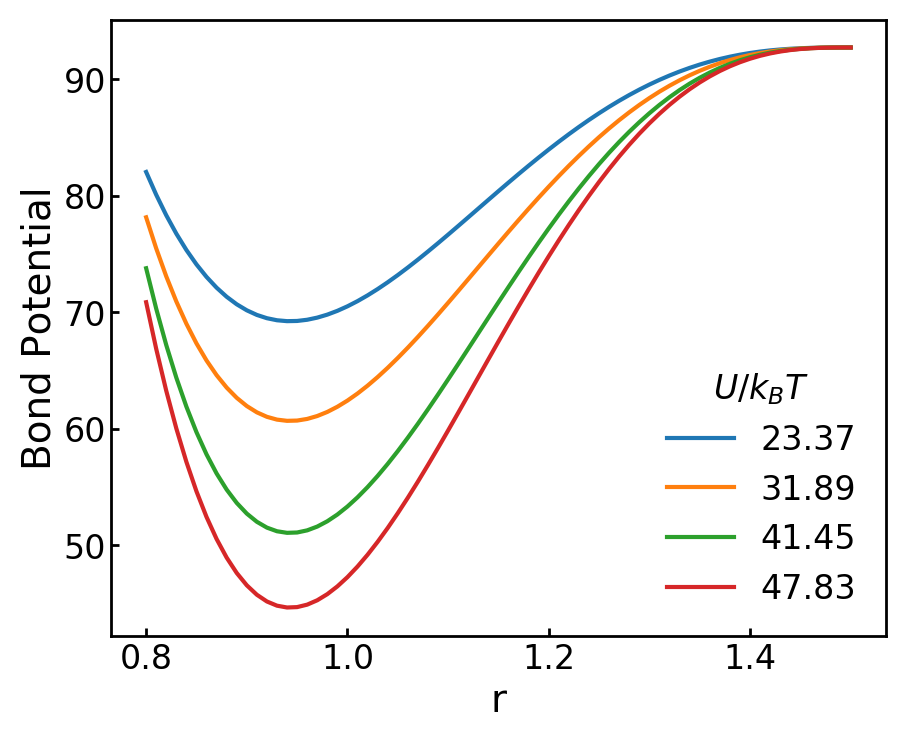

In [6]:
# calculate cohesive energy
r = np.arange(0.8,1.51,0.01)
r = np.round(r,2)
dQ = np.zeros(4)
for ik in range(4):
    Q = fn.QE(r, int(kvals[ik]))
    dQ[ik] = Q[r==1.5] - Q[r==0.96]
    plt.plot(r, Q, label=np.round(dQ[ik],2))
plt.legend(frameon=False, title=r'$U/k_BT$')
plt.ylabel('Bond Potential')
plt.xlabel('r')

# Figure 1: 3 Panels Plot for $\sigma_{ex}$ $h(N_e)$, and $N_b$ over $\epsilon_{H}$

In [ ]:
fpath = # path to simulation outputs
fout = './data' # path to data file
fname = # file name to save as
# This function calculate parameters needed for energy analysis. 
# Then it saves the parameters to fout as a {parametername}_{fname}.np file
fn.EnergyParameters(fpath, fout, fname)
# The one above is for, sigma_S, h(Ne), bond angle, bond length, Quartic potential, bond angle potential, and bond potential
fn.sscurve(fpath, fout, fname)
# The one above is for, sigma_E and epsilon_H

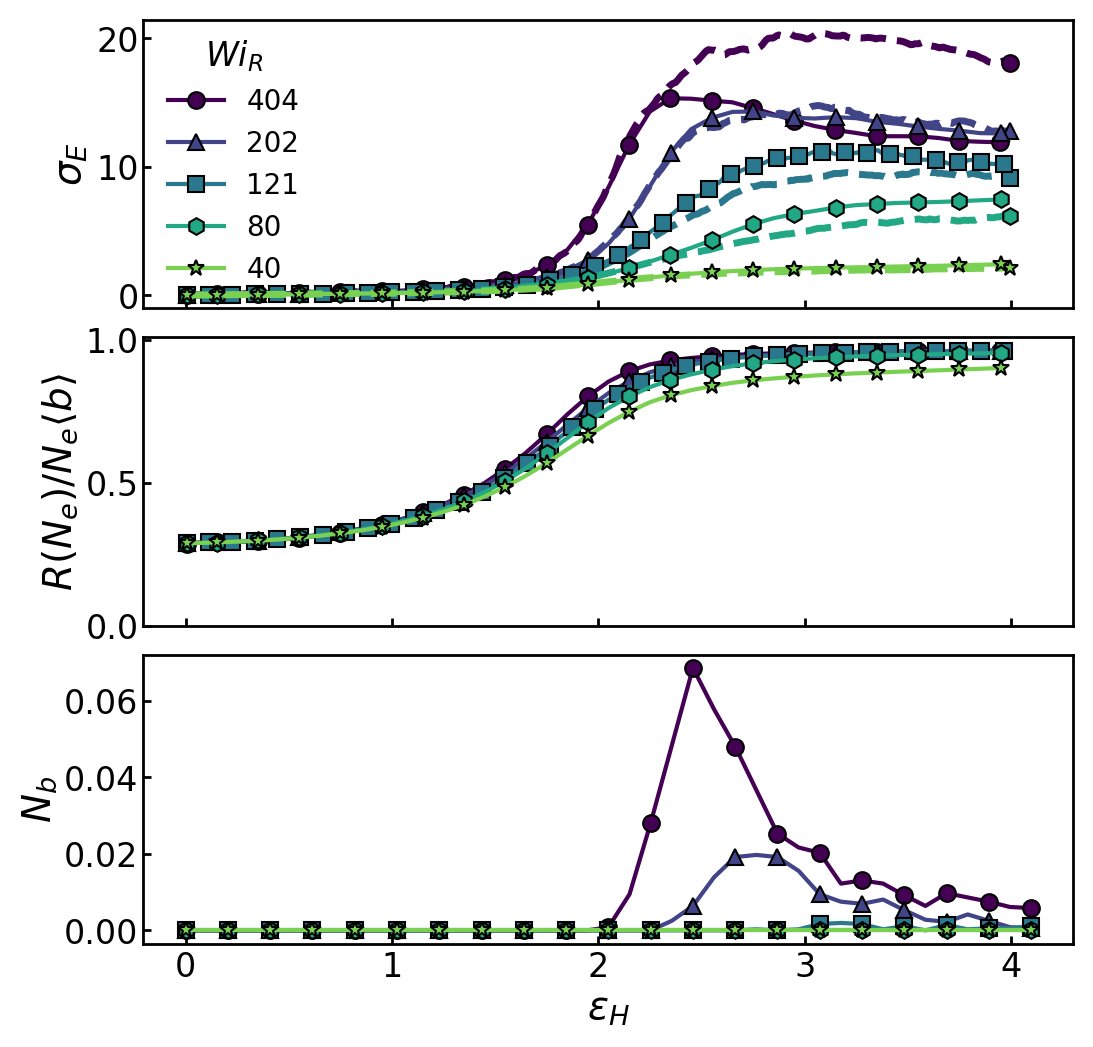

In [68]:
AllR = ['1E-3', '5E-4','3E-4','2E-4','1E-4'] # All rates
ik = 3 # index K value of a system
markers = itertools.cycle(['o','^','s','h','*'])
fg, ax = plt.subplots(3,1,figsize=[12,12],sharex=True)
fout = './data' # file path of output data

for ir in range(len(AllR)):
    rate = AllR[ir]
    erate = np.float(rate)
    mark = next(markers)
    #FENE
    fname = 'FE'+rate.upper()
    sigE0 = np.load(fout + '/sigEx_F' + rate.upper() + '.npy') # pressure from thermo output
    eps0  = np.load(fout + '/eps_F' + rate.upper() + '.npy')#  strain from thermo output
    ax[0].plot(eps0, -sigE0,color=cm.viridis(ir/len(AllR)),marker=mark,markeredgecolor='black',markevery=[-1],ls='--',lw=5)

    #Quartic
    fname = 'B'+bvals[ik]+'E'+rate.upper()
    Nb   = np.load(fout+'/Nbreak_' + fname + '.npy') # number of bond breaking
    hNe  = np.load(fout+'/hN_ne_' + fname + '.npy') # extension ration at Ne scale
    strain    = np.load(fout+'/strain_' + fname + '.npy') # timesteps
    eps  = np.load(fout+'/eps_' + fname + '.npy') # strain from thermo output
    sigE = np.load(fout+'/sigEx_' + fname + '.npy') # pressure from thermo output

    ax[1].plot(eps, hNe,color=cm.viridis(ir/len(AllR)),marker=mark,markeredgecolor='black',markevery=len(hNe)//40+1)
    ax[2].plot(strain, Nb, color=cm.viridis(ir/len(AllR)),marker=mark,markeredgecolor='black',markevery=len(strain)//40+1)
    ax[0].plot(eps,-sigE, color=cm.viridis(ir/len(AllR)),marker=mark,markeredgecolor='black',markevery=len(eps)//40+1,label=fn.Wi(rate))

    ax[0].legend(frameon=False,fontsize=20,title=r'$Wi_R$')
    plt.xlabel(r'$\epsilon_H$')
    ax[0].set_ylabel(r'$\sigma_{E}$')
    ax[2].set_ylabel(r'$N_b$')
    ax[1].set_ylabel(r'$R(N_e)/N_e\langle b \rangle$')
    ax[1].set_ylim([0,1.01])
    plt.subplots_adjust(wspace=0,hspace=0.1)

# Figure 2: Fraction of Unbroken Chains

In [ ]:
fpath = # dump file path
# To get number of scission/strain interval, phiN, and time
Nbreak, Num, t = fn.BreakCount(fpath)

Text(0.5, 0, '$\\epsilon_H$')

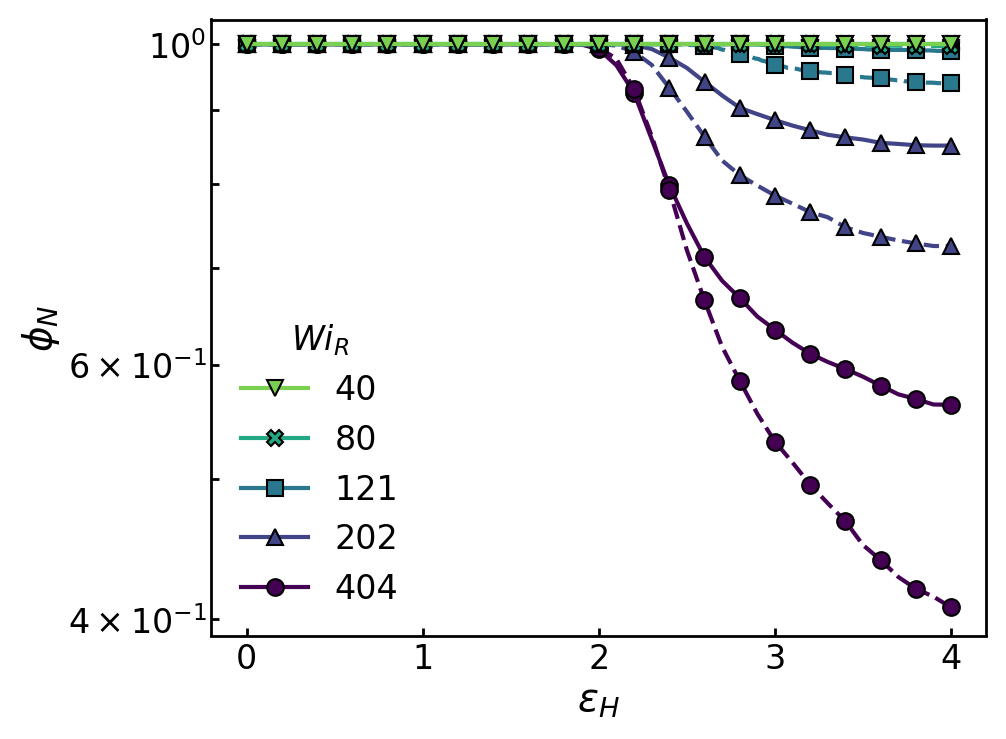

In [53]:
AllR = ['1E-3', '5E-4','3E-4', '2E-4', '1E-4']
markers = itertools.cycle(['o','^','s','X','v'])
fout = './data'

for ir in range(len(AllR)):
    rate = AllR[ir]
    erate = np.float(rate)
    mark = next(markers)
    fname = 'B3E'+rate
    # Import data
    yp = np.load(fout+"/Num_" + fname +'.npy')
    tp = np.load(fout+"/time_"+ fname +'.npy')
    strain = tp*erate

    # plot to strain = 4.0
    plt.plot(strain[strain<=4.0],yp[strain<=4.0],color = cm.viridis(ir/len(AllR)),marker=mark
                ,markevery = int(np.size(tp)/20),markeredgecolor='black',label=fn.Wi(rate))
    ik = 1
    K = kvals[ik]
    fname = 'B5E'+rate
    # Import data
    yp = np.load(fout+"/Num_" + fname +'.npy')
    tp = np.load(fout+"/time_"+ fname +'.npy')
    strain = tp*erate

    plt.plot(strain[strain<4.01],yp[strain<4.01],color = cm.viridis(ir/len(AllR)),marker=mark
                ,markevery = int(np.size(tp)/20),markeredgecolor='black',ls='--')
    # reordering the labels 
    handles, labels = plt.gca().get_legend_handles_labels() 
    # specify order 
    order = [4, 3, 2, 1, 0] 
  
# pass handle & labels lists along with order as below 
plt.legend([handles[i] for i in order], [labels[i] for i in order],frameon = False, title=r'$Wi_R$')
plt.ylabel(r'$\phi_N$')
plt.yscale('log')
plt.ylim([-0.1,1.04])
plt.xlabel(r'$\epsilon_H$')

# Figure 3: Chain Length Distribution

In [8]:
import pickle

In [ ]:
# Example of how to execute the analysis
fpath = # dump file path
fout = './data'# output file path
fname = 'Mw_dist' # filename

nf, Mw_dist = fn.MwDistribution(fpath, fout, fname)

# Save the data
with open(fout+'/'+fname+'.pkl', 'wb') as f:
    pickle.dump(Mw_dist, f)

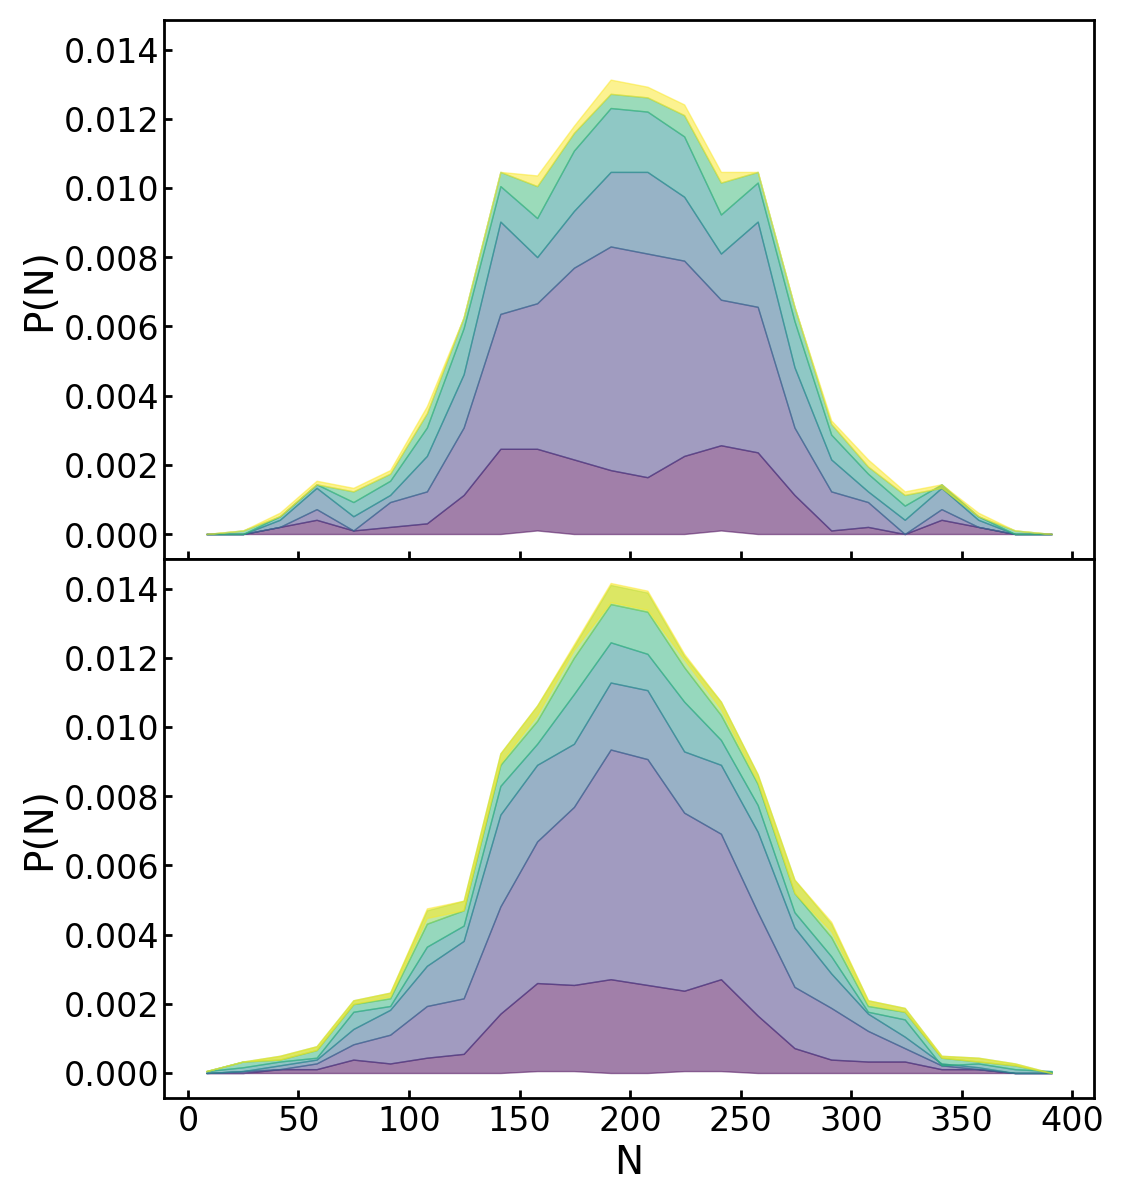

In [9]:
plt.close()
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=[12, 14])
nbin = 25 # histogram bin size
dh = 30 # strain interval
nf = 401 # number of output timeframes
# parameters for plotting
A3 = 9747
A5 = 18077.142857142855
fout = './data/'
# Load data
with open(fout+"/Mw_dist_B3.pkl", "rb") as f:
    Mw_dist_B3 = pickle.load(f)
with open(fout+"Mw_dist_B5.pkl", "rb") as f:
    Mw_dist_B5 = pickle.load(f)

# Process for Mw_dist_B3
for tf in range(nf):
    if len(Mw_dist_B3[tf]) != 0:
        tc = tf
        break
for tf in np.append(np.arange(tc, nf - dh, dh), nf - 1):
    if tf == nf - 1:
        m1 = Mw_dist_B3[nf - dh]
        m2 = Mw_dist_B3[tf]
    else:
        m1 = Mw_dist_B3[tf]
        m2 = Mw_dist_B3[tf + dh]

    he2, x = np.histogram(m2, bins=np.linspace(0, 399, nbin))
    he1, x = np.histogram(m1, bins=np.linspace(0, 399, nbin))
    x = (x[1:] + x[:-1]) / 2

    # Directly plot raw histogram data without filtering
    ax[0].fill_between(x, he1 / A3, he2 / A3, color=cm.viridis((tf - tc) / (nf - tc)), alpha=0.5)

# Process for Mw_dist_B5
for tf in range(nf):
    if len(Mw_dist_B5[tf]) != 0:
        tc = tf
        break
for tf in np.append(np.arange(tc, nf - dh, dh), nf - 1):
    if tf == nf - 1:
        m1 = Mw_dist_B5[nf - dh]
        m2 = Mw_dist_B5[tf]
    else:
        m1 = Mw_dist_B5[tf]
        m2 = Mw_dist_B5[tf + dh]

    he2, x = np.histogram(m2, bins=np.linspace(0, 399, nbin))
    he1, x = np.histogram(m1, bins=np.linspace(0, 399, nbin))
    x = (x[1:] + x[:-1]) / 2
    
    # Directly plot raw histogram data without filtering
    ax[1].fill_between(x, he1 / A5, he2 / A5, color=cm.viridis((tf - tc) / (nf - tc)), alpha=0.5)

# Add labels and title
ax[1].set_xlabel('N')
ax[0].set_ylabel('P(N)')
ax[1].set_ylabel('P(N)')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()
# plt.savefig('../MwDist_B3B5E5E-4_ver3.svg')

# Figure 4: Evolution of 4 stress terms

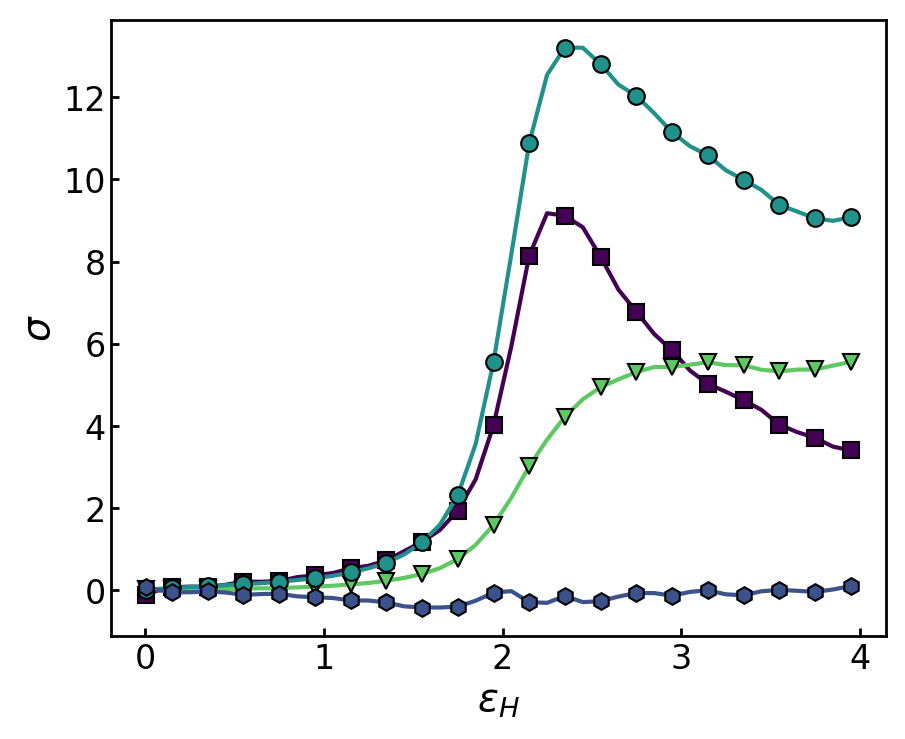

In [29]:
ik = 2
rate = '1E-3'
erate = np.float(rate)
fname = 'B'+bvals[ik]+'E'+rate.upper()
fout = './data'

sigS = np.load(fout+'/sigA_ne_' + fname + '.npy')
t    = np.load(fout+'/time_' + fname + '.npy') # timesteps
eps  = np.load(fout+'/eps_' + fname + '.npy') # strain from thermo output (sv.out)
sigE = -np.load(fout+'/sigEx_' + fname + '.npy') # stress from thermo output (sv.out)
Ua   = np.load(fout+'/Ua_'+fname+'.npy')  # Angle potential energy [timestep]
Ub   = np.load(fout+'/Ub_'+fname+'.npy')  # Potential energy [timestep, atoms]


sigUa = fn.Sdev(Ua,vol,t,rate,0.1,simple=True)
sigUb = fn.Sdev(Ub,vol,t,rate,0.1,simple=True)
sigU = sigUa + sigUb

sigQ = sigE - sigU - sigS

plt.plot(eps, sigQ,label=r'$W_{Q}$' ,color=cm.viridis(0/4),marker='s',markeredgecolor='black',markevery=len(eps)//40+1)
plt.plot(eps, sigS,label=r'$W_{S}$' ,color=cm.viridis(3/4),marker='v',markeredgecolor='black',markevery=len(eps)//40+1)  
plt.plot(eps, sigE,label=r'$W_{E}$' ,color=cm.viridis(2/4),marker='o',markeredgecolor='black',markevery=len(eps)//40+1)
plt.plot(eps, sigU,label=r'$W_{U}$' ,color=cm.viridis(1/4),marker='h',markeredgecolor='black',markevery=len(eps)//40+1)

plt.ylabel(r'$\sigma$')
plt.xlabel(r'$\epsilon_H$')
plt.savefig('./Figures/.svg')
plt.subplots_adjust(wspace=0,hspace=0)


# Figure 5: Energy Cost per Chain Scission

5
3


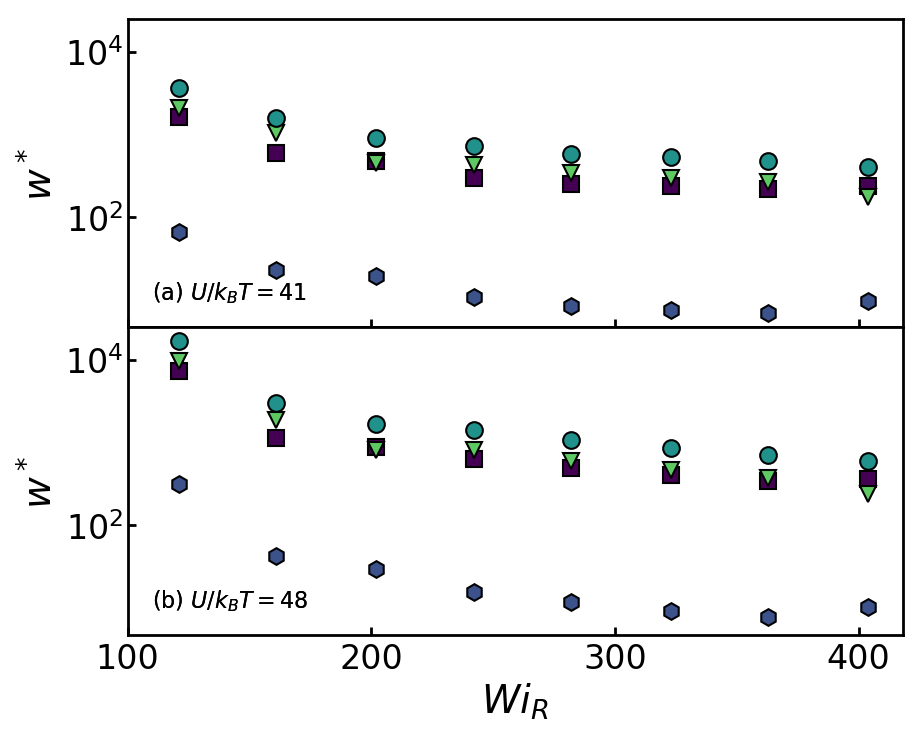

In [24]:
AllR = ['1E-3','9E-4','8E-4','7E-4','6E-4','5E-4','4E-4', '3E-4']
markers = itertools.cycle(['o','^','s','h'])
fig,ax = plt.subplots(2,1,figsize=[10,8],sharex=True,sharey=True)
fout = './data'
for ik in [2,3]:
    Ws_arr = []; Wi_arr = []
    print(bvals[ik])
    for rate in AllR:
        erate = np.float(rate)
        fname = 'B'+bvals[ik]+'E'+rate.upper()
        Nb   = np.load(fout+'/Nbreak_' + fname + '.npy')  # Number of bond breaking
        sigS = np.load(fout+'/sigA_ne_' + fname + '.npy')
        t    = np.load(fout+'/time_' + fname + '.npy') # timesteps
        eps  = np.load(fout+'/eps_' + fname + '.npy') # strain from thermo output (sv.out)
        sigE = -np.load(fout+'/sigEx_' + fname + '.npy') # stress from thermo output (sv.out)
        Ua   = np.load(fout+'/Ua_'+fname+'.npy')  # Angle potential energy [timestep]
        Ub   = np.load(fout+'/Ub_'+fname+'.npy')  # Potential energy [timestep, atoms]
        
        sigUa = fn.Sdev(Ua,vol,t,rate,0.1,simple=False) # taking derivative of the energy function
        sigUb = fn.Sdev(Ub,vol,t,rate,0.1,simple=False)
            
        strain = t*erate

        WU = np.sum(Nb) * dQ[ik] / vol
        WE = np.trapz(y=sigE,x=eps)
        WS = np.trapz(y=sigS,x=np.arange(0,4,4/len(sigS)))        
        Wa = np.trapz(y=sigUa,x=strain)
        Wb = np.trapz(y=sigUb,x=strain)
        WQ = WE - WS - Wa - Wb

        Ws_arr = np.append(Ws_arr,WQ/WU)
        Wi_arr = np.append(Wi_arr,fn.Wi(erate))

        ax[ik-2].plot(fn.Wi(erate), WQ/WU      ,label=r'$W_{Q}$'  ,color=cm.viridis(0/4),marker='s',markeredgecolor='black')
        ax[ik-2].plot(fn.Wi(erate), WS/WU      ,label=r'$W_{S}$'  ,color=cm.viridis(3/4),marker='v',markeredgecolor='black')  
        ax[ik-2].plot(fn.Wi(erate), WE/WU      ,label=r'$W_{E}$'  ,color=cm.viridis(2/4),marker='o',markeredgecolor='black')
        ax[ik-2].plot(fn.Wi(erate), abs(Wa+Wb)/WU,label=r'$W_{U}$',color=cm.viridis(1/4),marker='h',markeredgecolor='black')
        ax[ik-2].set_ylabel(r'$w^*$')

        ax[ik-2].set_yscale('log')

    ax[0].text(110,10,r'(a) $U/k_BT = 41$',fontsize=16)
    ax[1].text(110,10,r'(b) $U/k_BT = 48$',fontsize=16)

    plt.xlabel(r'$Wi_R$')
    ax[0].set_xticks([100,200,300,400])
    ax[1].set_xticks([100,200,300,400])
    ax[0].set_yscale('log')
    ax[1].set_yscale('log')

plt.subplots_adjust(wspace=0,hspace=0)

# Export Plots' Legends

In [9]:
def export_legend(legend, filename):
    '''Creat legend plot.'''
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

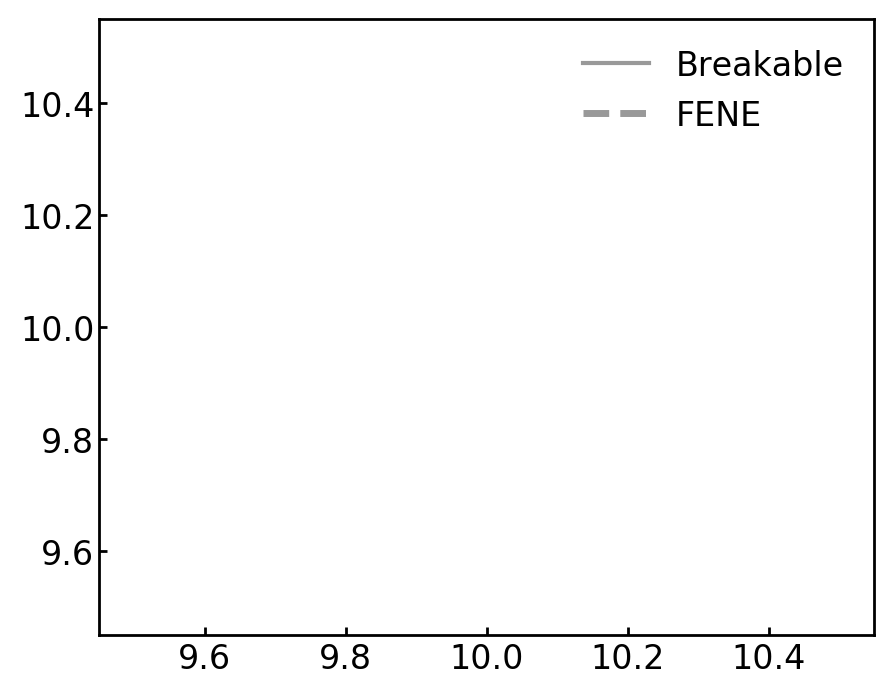

In [10]:
x = np.array(10)
plt.plot(x,x,label=r'Breakable',color=cm.gray(3/5),alpha=1)
plt.plot(x,x,label=r'FENE',color=cm.gray(3/5),ls='--',LW=5)  
legend = plt.legend(frameon=False)
export_legend(legend, './Figures/legend_fenequartic.svg')

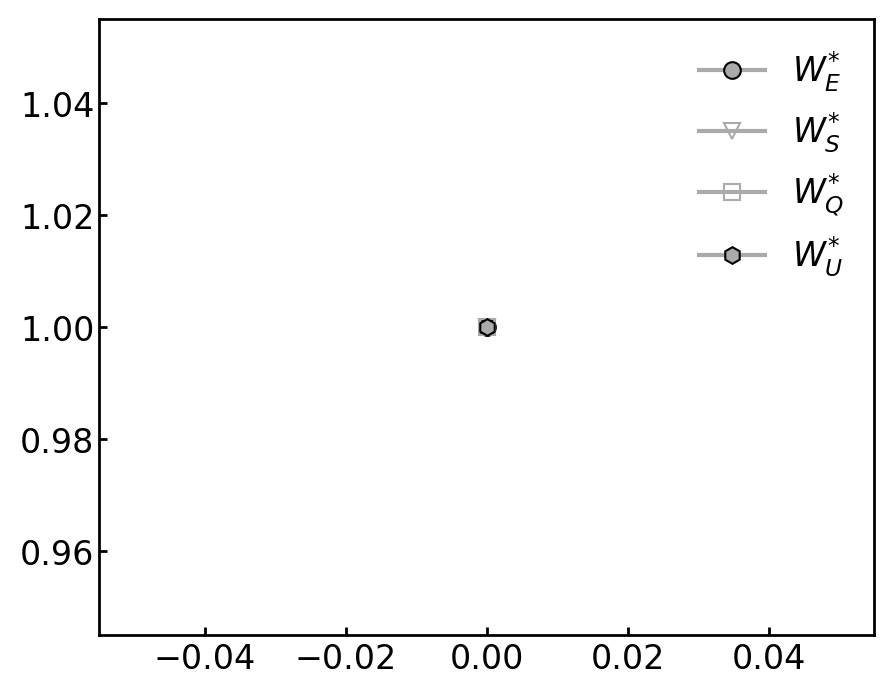

In [9]:
ik=3
plt.plot(Wi(erate), WS/np.sum(Nb)        ,label=r'$W_{Q}$'  ,color=cm.viridis(0/5),marker='v',fillstyle='none', markeredgewidth=2)
plt.plot(Wi(erate), WS/np.sum(Nb)        ,label=r'$W_{S}$'  ,color=cm.viridis(1/5),marker='v',fillstyle='none', markeredgewidth=2)  
plt.plot(Wi(erate), WE/np.sum(Nb)        ,label=r'$W_{E}$'  ,color=cm.viridis(2/5),marker='o',markeredgecolor='black')
plt.plot(Wi(erate), np.sum(Ua)/np.sum(Nb),label=r'$W_{U_a}$',color=cm.viridis(3/5),marker='s',markeredgecolor='black')
plt.plot(Wi(erate), np.sum(Ub)/np.sum(Nb),label=r'$W_{U_b}$',color=cm.viridis(4/5),marker='h',markeredgecolor='black')
plt.plot(0,1,color=cm.gray((2*(ik-2))/3),alpha=1.0,marker='o',markeredgecolor='black',label=r'$W_{E}^{*}$')
plt.plot(0,1,color=cm.gray((2*(ik-2))/3),alpha=1.0,marker='v',fillstyle='none',label=r'$W_{S}^{*}$')
plt.plot(0,1,color=cm.gray((2*(ik-2))/3),alpha=1.0,marker='s',fillstyle='none',label=r'$W_{Q}^{*}$')
plt.plot(0,1,color=cm.gray((2*(ik-2))/3),alpha=1.0,marker='h',markeredgecolor='black',label=r'$W_{U}^{*}$')
legend = plt.legend(frameon=False)
export_legend(legend, '../Figures/legend_WNb.svg')